In [2]:
import numpy as np
import pandas as pd

In [38]:
df = pd.read_csv('/content/placement.csv')

In [39]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [41]:
df = df.iloc[:,1:]

In [42]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [45]:
import matplotlib.pyplot as plt


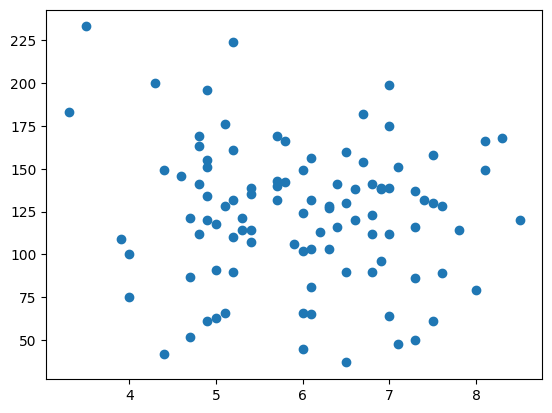

In [49]:
plt.scatter(df['cgpa'],df['iq'])

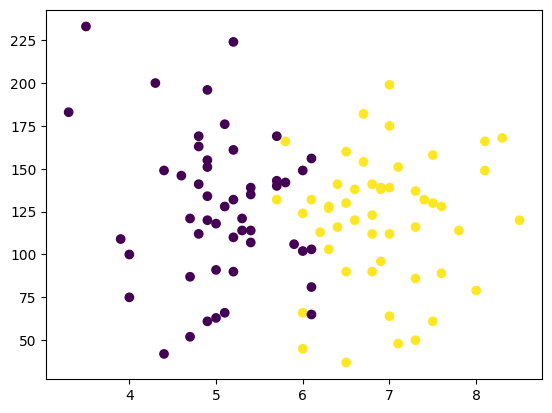

In [48]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [50]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [51]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [55]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [58]:
x_train

,cgpa,iq
62,6.0,102.0
10,6.0,45.0
69,8.5,120.0
53,8.3,168.0
95,4.3,200.0
...,...,...
61,7.3,137.0
32,7.0,139.0
43,6.8,141.0
74,6.7,154.0


In [59]:
y_train

,placement
62,0
10,1
69,1
53,1
95,0
...,...
61,1
32,1
43,1
74,1


In [61]:
x_test

,cgpa,iq
92,5.2,110.0
30,7.6,128.0
11,6.9,138.0
98,6.3,103.0
57,6.5,130.0
72,7.3,116.0
16,5.2,224.0
24,4.7,121.0
37,8.1,149.0
76,4.9,155.0


In [63]:
from sklearn.preprocessing import StandardScaler


In [65]:
scaler = StandardScaler()

In [67]:
x_train = scaler.fit_transform(x_train)

In [69]:
x_train

array([[ 0.03533142, -0.49922899],
       [ 0.03533142, -1.91887684],
       [ 2.24354548, -0.05091914],
       [ 2.06688835,  1.14457378],
       [-1.46625413,  1.94156907],
       [ 0.12365999, -1.02225715],
       [-0.49463995,  0.3226724 ],
       [ 0.47697424, -0.79810222],
       [-1.02461132,  0.47210901],
       [-0.1413257 ,  0.49701512],
       [ 0.03533142,  0.04870527],
       [ 0.74195992, -0.79810222],
       [-0.67129707,  0.24795409],
       [ 0.38864567, -0.15054355],
       [ 1.62524554, -0.20035576],
       [-1.02461132,  1.16947989],
       [ 0.47697424,  0.94532496],
       [ 1.18360273, -1.79434633],
       [-0.1413257 ,  1.09476158],
       [-1.37792557,  0.67135783],
       [ 0.83028848,  0.42229681],
       [-0.93628276, -1.5203792 ],
       [ 0.74195992,  0.02379916],
       [-0.22965426,  0.44720291],
       [-2.17288263,  2.76347046],
       [ 1.36025986,  0.19814188],
       [-0.49463995, -0.20035576],
       [-0.22965426,  0.24795409],
       [ 0.03533142,

In [70]:
x_test = scaler.fit_transform(x_test)

In [71]:
x_test

array([[-0.92917099, -0.83575436],
       [ 1.15495085, -0.28671865],
       [ 0.54708198,  0.01830119],
       [ 0.02605152, -1.04926825],
       [ 0.19972834, -0.22571468],
       [ 0.89443562, -0.65274246],
       [-0.92917099,  2.64147182],
       [-1.36336304, -0.50023254],
       [ 1.5891429 ,  0.35382302],
       [-1.18968622,  0.53683492]])

In [75]:
 from sklearn.linear_model import LogisticRegression

In [76]:
clf = LogisticRegression()

In [79]:
# model training
clf.fit(x_train,y_train)

LogisticRegression()

In [85]:
y_pred = clf.predict(x_test)

In [87]:
y_test

,placement
92,0
30,1
11,1
98,1
57,1
72,1
16,0
24,0
37,1
76,0


In [90]:
from sklearn.metrics import accuracy_score


In [92]:
accuracy_score(y_test,y_pred)

0.9

In [93]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

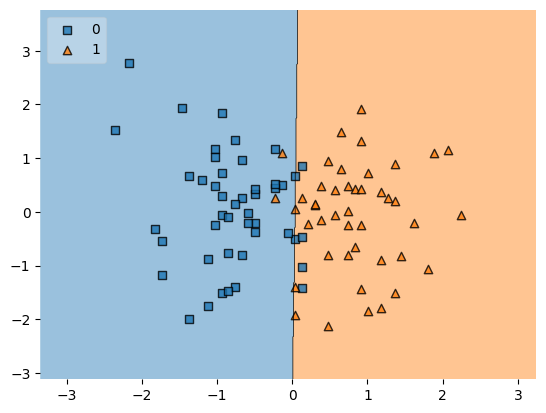

In [95]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [96]:
import pickle

In [97]:
pickle.dump(clf,open('model.pkl','wb'))